# Exp-3

In [9]:
pip install matplotlib


     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ----------- ---------------------------- 30.7/104.0 kB ? eta -:--:--
     ----------- ---------------------------- 30.7/104.0 kB ? eta -:--:--
     ------------------------------------ 104.0/104.0 kB 852.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 3.5 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.1 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/8.1 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 3.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 4.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.1 MB 4.1 MB/s eta 0:00:02
   -------- ----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 0, Total Error: 3
Epoch 1000, Total Error: 0
Epoch 2000, Total Error: 0
Epoch 3000, Total Error: 0
Epoch 4000, Total Error: 0
Epoch 5000, Total Error: 0
Epoch 6000, Total Error: 0
Epoch 7000, Total Error: 0
Epoch 8000, Total Error: 0
Epoch 9000, Total Error: 0
Predictions: [0 1 1 0]
Accuracy: 100.00%


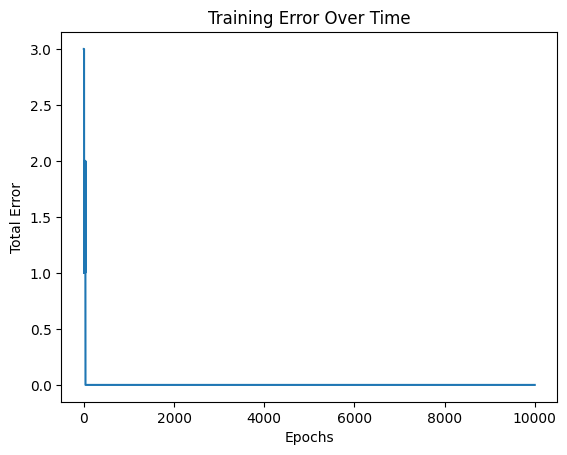

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

class MLP_XOR:
    def __init__(self, input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        
        self.errors = []

    def forward(self, X):
        self.hidden_input = np.dot(X, self.W1) + self.b1
        self.hidden_output = step_function(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.W2) + self.b2
        self.final_output = step_function(self.final_input)
        return self.final_output

    def train(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = X[i:i+1]  # Select single sample
                yi = y[i:i+1]
                
                # Forward pass
                hidden_input = np.dot(xi, self.W1) + self.b1
                hidden_output = step_function(hidden_input)
                final_input = np.dot(hidden_output, self.W2) + self.b2
                final_output = step_function(final_input)
                
                # Compute error
                error = yi - final_output
                total_error += np.abs(error)
                
                # Backpropagation (Weight Update)
                self.W2 += self.learning_rate * error * hidden_output.T
                self.b2 += self.learning_rate * error
                self.W1 += self.learning_rate * np.dot(xi.T, error * self.W2.T * hidden_output * (1 - hidden_output))
                self.b1 += self.learning_rate * error * self.W2.T * hidden_output * (1 - hidden_output)
            
            self.errors.append(total_error.sum())
            # Print error at intervals
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Total Error: {total_error.sum()}")

    def predict(self, X):
        return self.forward(X)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train MLP
mlp = MLP_XOR()
mlp.train(X, y)

# Test predictions
predictions = mlp.predict(X)
accuracy = np.mean(predictions == y) * 100
print("Predictions:", predictions.flatten())
print(f"Accuracy: {accuracy:.2f}%")

# Plot error graph
plt.plot(mlp.errors)
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Training Error Over Time")
plt.show()
